In [499]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import math

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, Birch, SpectralClustering, MiniBatchKMeans,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [84]:
ticker = ['PTT.BK','AOT.BK','PTTEP.BK','ADVANC.BK','CPALL.BK','JAS.BK','SCC.BK','DELTA.BK','BDMS.BK',
          'MAKRO.BK','KBANK.BK','EA.BK','TPIPP.BK','IVL.BK','CPN.BK','BBL.BK','LHFG.BK','BAY.BK','NEX.BK',
          'CPF.BK','INTUCH.BK','KTB.BK','BEC.BK','PTTGC.BK','JTS.BK','MINT.BK','HMPRO.BK','GPSC.BK','CIMBT.BK',
          'KTC.BK','TRUE.BK','BH.BK','BJC.BK','BEM.BK','TTB.BK','TOP.BK','BTS.BK','JMT.BK','CBG.BK','DTAC.BK',
          'LH.BK','GLOBAL.BK','TPIPL.BK','MTC.BK','EGCO.BK','PLANB.BK','BANPU.BK','PSH.BK','AMATA.BK','COM7.BK','JMART.BK',
          'KCE.BK','SAWAD.BK','TISCO.BK','IRPC.BK','BLA.BK','PSG.BK','TFMAMA.BK','AP.BK','RAM.BK','CENTEL.BK','VGI.BK',
          'KKP.BK','RATCH.BK','SPRC.BK','STARK.BK','MBK.BK','TASCO.BK','GUNKUL.BK','PSL.BK','WHA.BK','BCH.BK','BPP.BK',
          'BCP.BK','TFG.BK','M.BK','AEONTS.BK','SCCC.BK','CKP.BK','MEGA.BK','TCAP.BK','TTW.BK','FORTH.BK','SPALI.BK',
          'ESSO.BK','CHG.BK','SINGER.BK','SVH.BK','EPG.BK','SKR.BK','BYD.BK','BKI.BK','HANA.BK','RCL.BK','FPT.BK',
          'CK.BK','STA.BK','BCPG.BK','VIBHA.BK','AAV.BK']

name = [r.replace('.BK','') for r in ticker]

In [207]:
stock = yf.download(ticker,period='4y')['Adj Close']

[*********************100%***********************]  100 of 100 completed


In [208]:
stock.head()

,AAV.BK,ADVANC.BK,AEONTS.BK,AMATA.BK,AOT.BK,AP.BK,BANPU.BK,BAY.BK,BBL.BK,BCH.BK,...,TISCO.BK,TOP.BK,TPIPL.BK,TPIPP.BK,TRUE.BK,TTB.BK,TTW.BK,VGI.BK,VIBHA.BK,WHA.BK
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-11,5.438091,164.906235,139.748688,20.607119,65.809196,7.446526,17.450748,37.102215,171.928177,14.326468,...,63.579651,77.960518,1.582759,5.086998,6.321723,1.965266,9.927907,7.452684,2.222540,3.759103
2018-06-12,5.389536,164.906235,137.061203,20.883108,65.809196,7.570635,17.776934,37.549232,173.240601,14.684630,...,63.216343,77.074600,1.574157,5.086998,6.138484,1.965266,10.010641,7.500766,2.240464,3.741372
2018-06-13,5.340982,163.611160,135.717484,20.607119,65.086014,7.487896,17.776934,37.325722,173.240601,14.505549,...,63.397995,75.745735,1.574157,5.125538,6.092675,1.981115,9.927907,7.452684,2.204616,3.759103
2018-06-14,5.243873,163.179474,133.925812,20.331131,64.844955,7.405157,17.776934,37.325722,174.553040,14.505549,...,63.579651,72.202065,1.574157,5.125538,6.046865,1.949417,9.927907,7.404603,2.186693,3.741372
2018-06-15,5.292428,164.474564,133.477921,20.331131,64.844955,7.363787,17.287659,37.102215,174.553040,14.595088,...,64.124626,72.645020,1.599963,5.048461,6.138484,1.965266,9.927907,7.404603,2.114998,3.741372


In [41]:
def load(ticker,name):
    for x,y in zip(ticker,name):
        globals()[y] = yf.download(x,periods='5y')
        
def financial_statement(ticker,name):
    for x,y in zip(ticker,name):
        globals()[y+'_ticker'] = yf.Ticker(x)
        globals()[y+'_bs'] = globals()[y+'_ticker'].balance_sheet.transpose()
        globals()[y+'_is'] = globals()[y+'_ticker'].financials.transpose()
        globals()[y+'_cf'] = globals()[y+'_ticker'].cashflow.transpose()

In [42]:
load(ticker,name)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [44]:
financial_statement(ticker,name)

## PART I. FINANCIAL RATIO EXTRACTION

In [341]:
#Net Profit Margin
NPM = pd.DataFrame([0.05],columns=['start'])
for i in name:
    NPM[i] = np.mean(globals()[i+'_is']['Net Income']/globals()[i+'_is']['Total Revenue'])
NPM = NPM.drop('start',axis=1)
NPM = NPM.transpose()
NPM.columns = ['NPM']

#Gross Profit Margin
GPM = pd.DataFrame([0.05],columns=['start'])
for i in name:
    GPM[i] = np.mean(globals()[i+'_is']['Gross Profit']/globals()[i+'_is']['Total Revenue'])
GPM = GPM.drop('start',axis=1)
GPM = GPM.transpose()
GPM.columns = ['GPM']

#Return on Equity
ROE = pd.DataFrame([0.05],columns=['start'])
for i in name:
    ROE[i] = np.mean(globals()[i+'_is']['Net Income']/globals()[i+'_bs']['Total Stockholder Equity'])
ROE = ROE.drop('start',axis=1)
ROE = ROE.transpose()
ROE.columns = ['ROE']

#Current Ratio
CR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    CR[i] = np.mean(globals()[i+'_bs']['Total Current Assets']/globals()[i+'_bs']['Total Current Liabilities'])
CR = CR.drop('start',axis=1)
CR = CR.transpose()
CR.columns = ['CR']

#CFO-to-Liability Ratio
CFOR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    CFOR[i] = np.mean(globals()[i+'_cf']['Total Cash From Operating Activities']/globals()[i+'_bs']['Total Current Liabilities'])
CFOR = CFOR.drop('start',axis=1)
CFOR = CFOR.transpose()
CFOR.columns = ['CFOR']

#Debt-to-Equity
DE = pd.DataFrame([0.05],columns=['start'])
for i in name:
    DE[i] = np.mean(globals()[i+'_bs']['Total Liab']/globals()[i+'_bs']['Total Stockholder Equity'])
DE = DE.drop('start',axis=1)
DE = DE.transpose()
DE.columns = ['DE']

#Interest Coverage Ratio
ICR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    ICR[i] = np.mean(globals()[i+'_is']['Operating Income']/globals()[i+'_is']['Interest Expense'])
ICR = ICR.drop('start',axis=1)
ICR = ICR.transpose()
ICR.columns = ['ICR']

#Payable Turnover Ratio
PTR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    try:
        PTR[i] = np.mean(((globals()[i+'_is']['Cost Of Revenue']/(globals()[i+'_bs']['Accounts Payable'].rolling(window=2).mean())).dropna()))
    except KeyError: 
        PTR[i] = 0
PTR = PTR.drop('start',axis=1)
PTR = PTR.transpose()
PTR.columns = ['PTR']

#Inventory Turnover Ratio
ITR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    try:
        ITR[i] = np.mean(((globals()[i+'_is']['Cost Of Revenue']/(globals()[i+'_bs']['Inventory'].rolling(window=2).mean())).dropna()))
    except KeyError: 
        ITR[i] = 0
ITR = ITR.drop('start',axis=1)
ITR = ITR.transpose()
ITR.columns = ['ITR']

#Receivable Turnover Ratio
RTR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    try:
        RTR[i] = np.mean(((globals()[i+'_is']['Total Revenue']/(globals()[i+'_bs']['Net Receivables'].rolling(window=2).mean())).dropna()))
    except KeyError:
        RTR[i] = 0
RTR = RTR.drop('start',axis=1)
RTR = RTR.transpose()
RTR.columns = ['RTR']

#Cash Conversion Cycle
CCC = pd.concat([PTR,ITR,RTR],axis=1)
CCC = CCC.fillna(0)
CCC['CCC_old'] = 365*((1/CCC['ITR'])+(1/CCC['RTR'])-(1/CCC['PTR']))
convert = []
for i in CCC['CCC_old']:
    if math.isinf(i) or math.isnan(i):
        convert.append(0)
    else:
        convert.append(i)
CCC['CCC'] = convert
CCC = CCC[['CCC_']]

#CAGR
stock_k = stock.loc[['2022-06-10','2018-06-11']]
stock_k = stock_k.div(stock_k.iloc[1])
stock_k = stock_k.loc['2022-06-10']

CAGR = pd.DataFrame([0.05],columns=['start'])
for i in name:
    CAGR[i] = ((stock_k[i+'.BK'].values)**(1/3))-1
CAGR = CAGR.drop('start',axis=1)
CAGR = CAGR.transpose()
CAGR.columns = ['CAGR']

C:\Users\WARINT~1.NAW\AppData\Local\Temp/ipykernel_11972/4039540412.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  NPM[i] = np.mean(globals()[i+'_is']['Net Income']/globals()[i+'_is']['Total Revenue'])
C:\Users\WARINT~1.NAW\AppData\Local\Temp/ipykernel_11972/4039540412.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  GPM[i] = np.mean(globals()[i+'_is']['Gross Profit']/globals()[i+'_is']['Total Revenue'])
C:\Users\WARINT~1.NAW\AppData\Local\Temp/ipykernel_11972/4039540412.py:20: PerformanceWarning: DataFrame is highly 

In [360]:
thstock = pd.concat([NPM,GPM,ROE,CR,CFOR,DE,ICR,PTR,ITR,RTR,CCC,CAGR],axis=1)
thstock = thstock.fillna(0)
thstock

,NPM,GPM,ROE,CR,CFOR,DE,ICR,PTR,ITR,RTR,CCC,CAGR
PTT,0.041110,0.121907,0.098274,2.033636,0.686098,1.388964,-6.388215,12.181965,11.995739,10.181607,36.314103,-0.045419
AOT,-0.320577,0.363704,0.055655,2.819919,0.463676,0.382071,-17.370239,10.324552,48.200326,11.465500,4.054573,0.014679
PTTEP,0.194646,0.786631,0.096038,2.166032,1.402642,0.824444,-9.116558,9.828318,3.565320,5.512697,131.448309,0.154121
ADVANC,0.163579,0.365350,0.414725,0.441018,0.883469,3.554764,-7.493411,4.888395,34.841029,9.683197,-26.496318,0.080460
CPALL,0.032631,0.248184,0.194049,0.668730,0.306181,4.118178,-3.624226,5.073923,12.122460,53.462224,-34.999793,-0.048546
...,...,...,...,...,...,...,...,...,...,...,...,...
CK,0.067360,0.095057,0.055497,1.111832,-0.029433,2.171775,0.111886,8.517439,46.276729,3.394547,72.559468,-0.068337
STA,0.071558,0.197200,0.165954,1.529791,0.347271,1.173921,-15.845497,45.041526,3.508425,8.318613,139.809171,0.335445
BCPG,0.512407,0.689224,0.105460,2.045634,0.742610,1.227718,-3.199417,15.820933,0.000000,3.031962,0.000000,-0.116143
VIBHA,0.136907,0.292207,0.102703,0.360065,0.258182,1.103962,-5.349730,13.404778,26.878530,6.494911,42.548356,0.037212


In [361]:
thstock.describe()

,NPM,GPM,ROE,CR,CFOR,DE,ICR,PTR,ITR,RTR,CCC,CAGR
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.164872,0.384909,0.108188,1.680777,0.355657,2.224002,-531.210399,10.717692,66.355815,17.149028,109.697556,0.184531
std,0.325429,0.302806,0.116089,1.224325,0.573428,2.293407,4580.693795,11.720991,351.850185,46.994475,236.738886,0.564529
min,-1.092659,-0.575093,-0.360649,0.047799,-2.372356,0.169748,-45759.779510,0.000000,0.000000,0.000000,-71.668044,-0.242393
25%,0.056966,0.191795,0.060016,0.797345,0.067094,0.722532,-16.224348,4.280596,0.344708,3.317289,0.000000,-0.043744
50%,0.110745,0.329174,0.102225,1.365591,0.296009,1.391350,-3.671514,9.202943,5.772143,6.080141,39.262726,0.033471
75%,0.268971,0.503658,0.156991,2.246401,0.608808,2.552531,-0.610144,13.454628,13.942381,11.519759,107.063210,0.152725
max,2.579239,1.000000,0.414725,5.693532,1.860954,11.282259,71.963355,72.269630,2850.366304,389.180990,1405.472983,4.603292


In [484]:
th_cluster = thstock.copy()

## PART II.EXPLORATORY DATA ANALYSIS

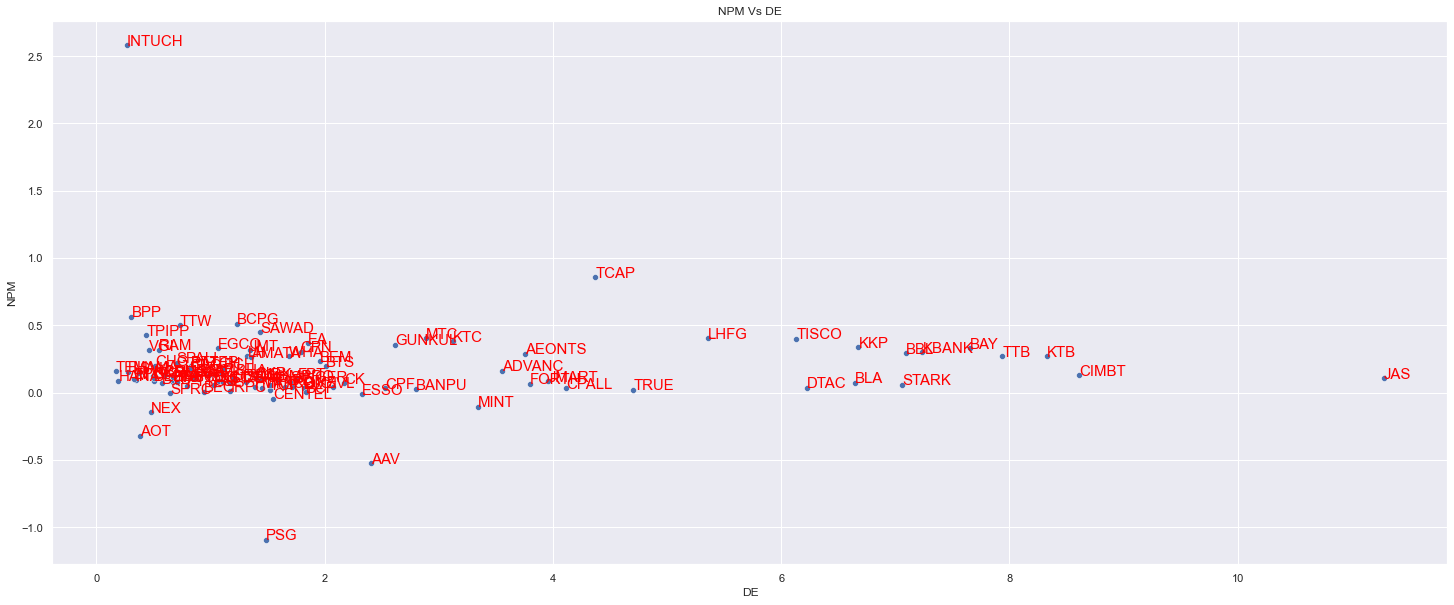

In [578]:
sns.scatterplot(x='DE',y='NPM',data=th_cluster)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('NPM Vs DE')
for i in range(th_cluster.shape[0]):
    plt.text(x=th_cluster.DE[i],y=th_cluster.NPM[i],s=th_cluster.index[i],fontdict=dict(color='red',size=15))

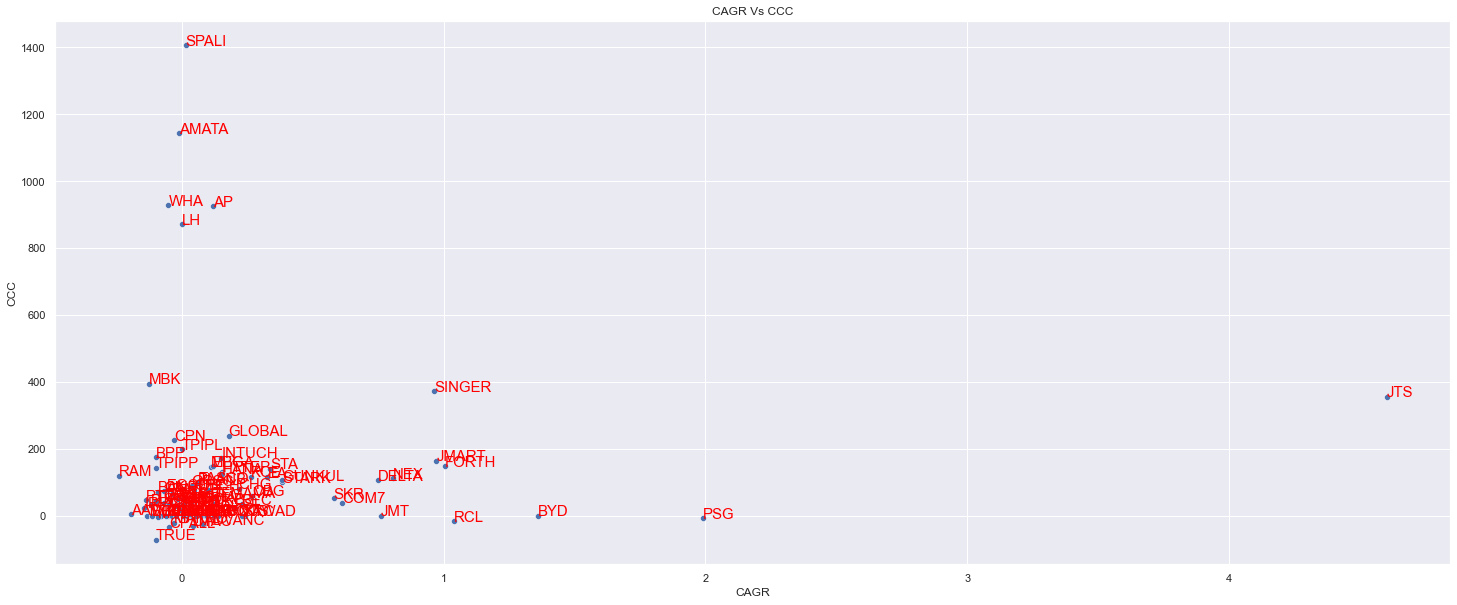

In [592]:
sns.scatterplot(x='CAGR',y='CCC',data=th_cluster)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('CAGR Vs CCC')
for i in range(th_cluster.shape[0]):
    plt.text(x=th_cluster.CAGR[i],y=th_cluster.CCC[i],s=th_cluster.index[i],fontdict=dict(color='red',size=15))

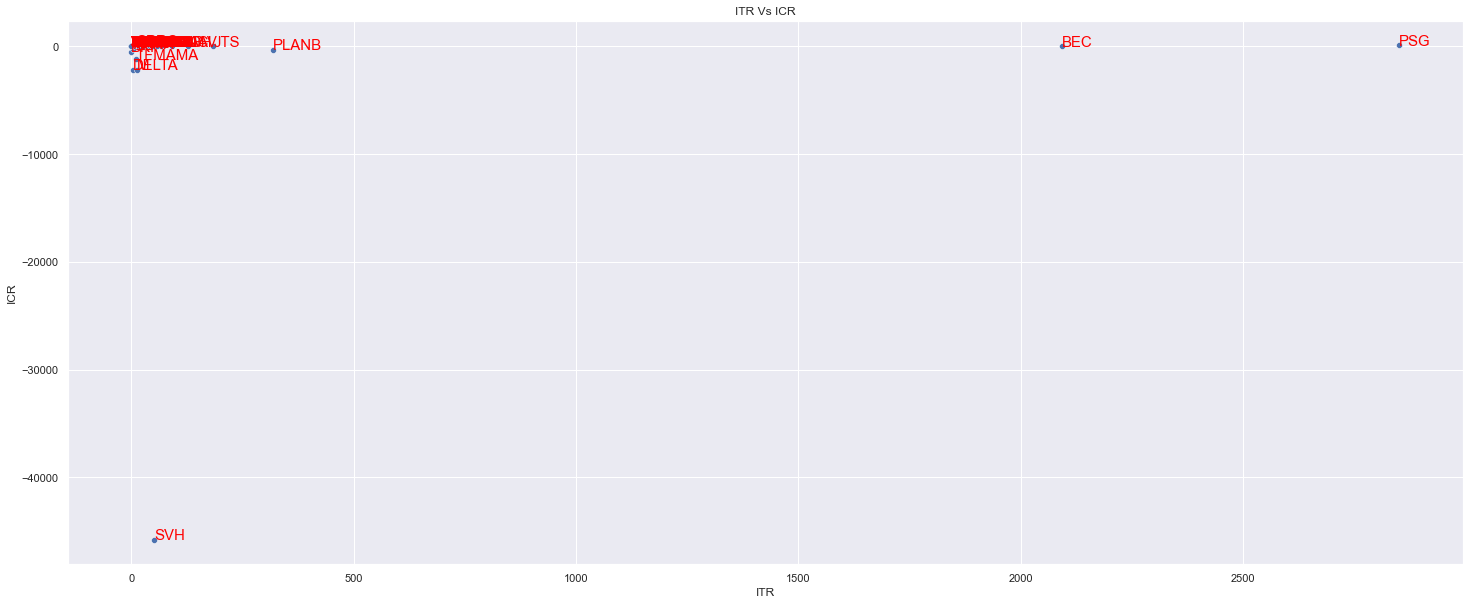

In [594]:
sns.scatterplot(x='ITR',y='ICR',data=th_cluster)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('ITR Vs ICR')
for i in range(th_cluster.shape[0]):
    plt.text(x=th_cluster.ITR[i],y=th_cluster.ICR[i],s=th_cluster.index[i],fontdict=dict(color='red',size=15))

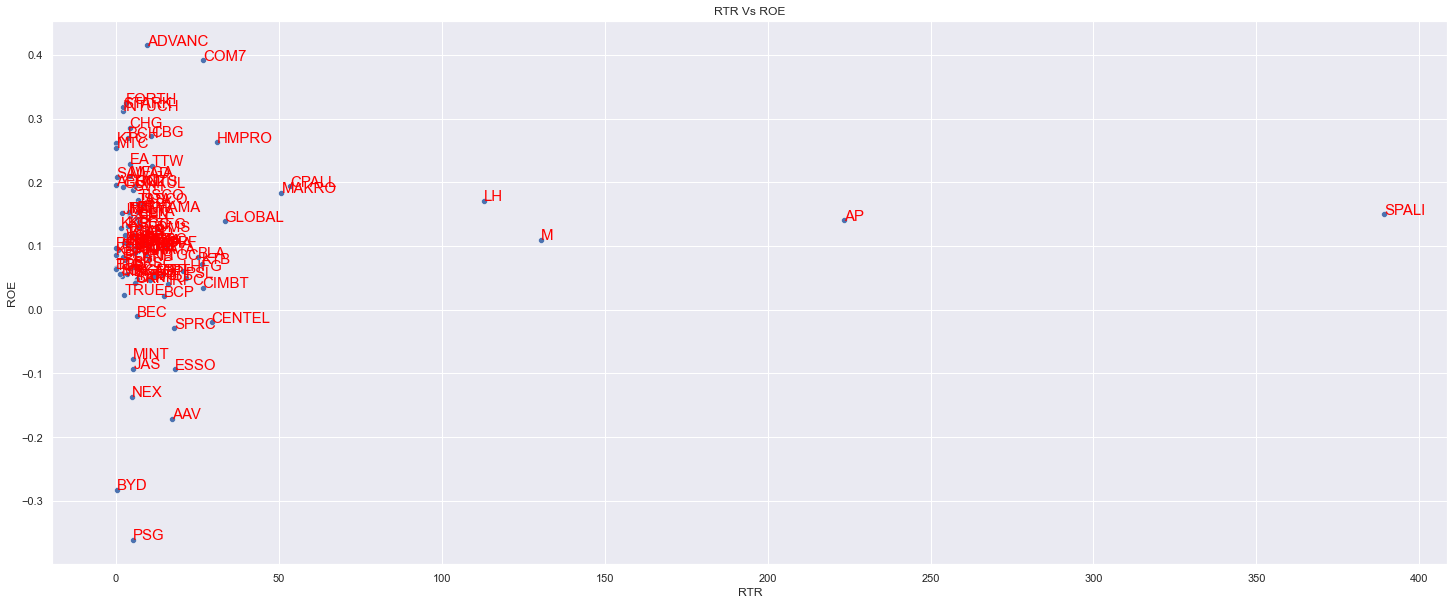

In [595]:
sns.scatterplot(x='RTR',y='ROE',data=th_cluster)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('RTR Vs ROE')
for i in range(th_cluster.shape[0]):
    plt.text(x=th_cluster.RTR[i],y=th_cluster.ROE[i],s=th_cluster.index[i],fontdict=dict(color='red',size=15))

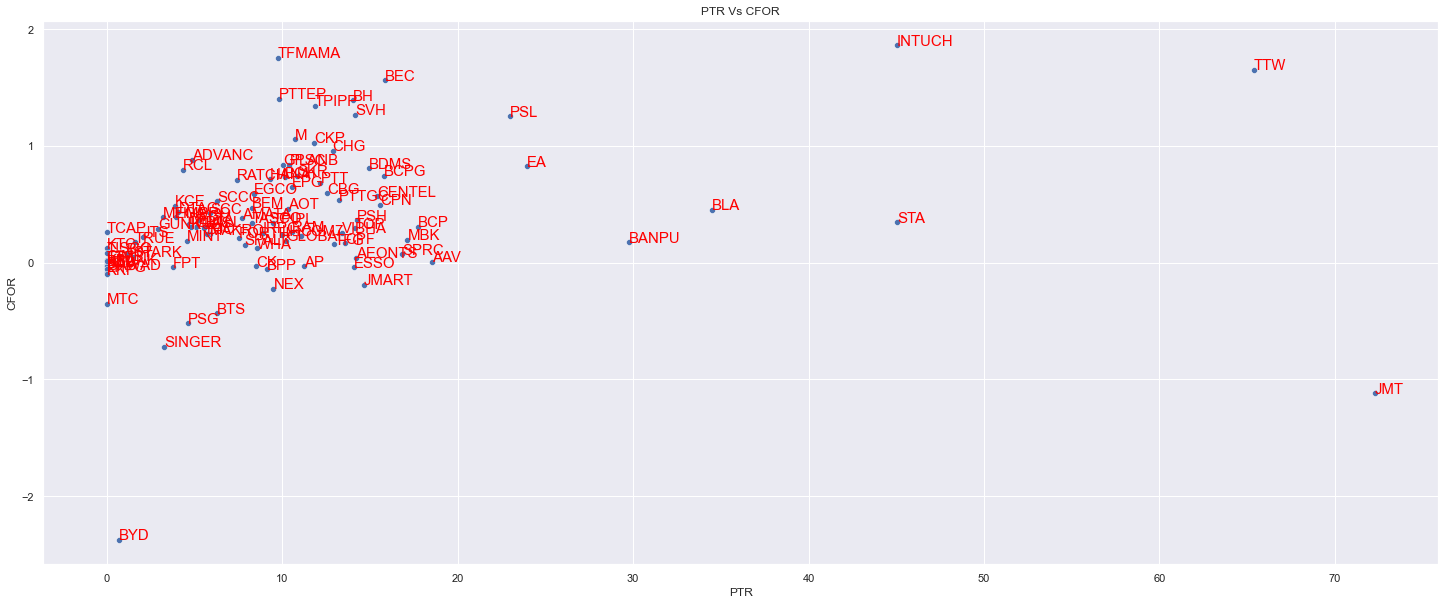

In [596]:
sns.scatterplot(x='PTR',y='CFOR',data=th_cluster)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('PTR Vs CFOR')
for i in range(th_cluster.shape[0]):
    plt.text(x=th_cluster.PTR[i],y=th_cluster.CFOR[i],s=th_cluster.index[i],fontdict=dict(color='red',size=15))

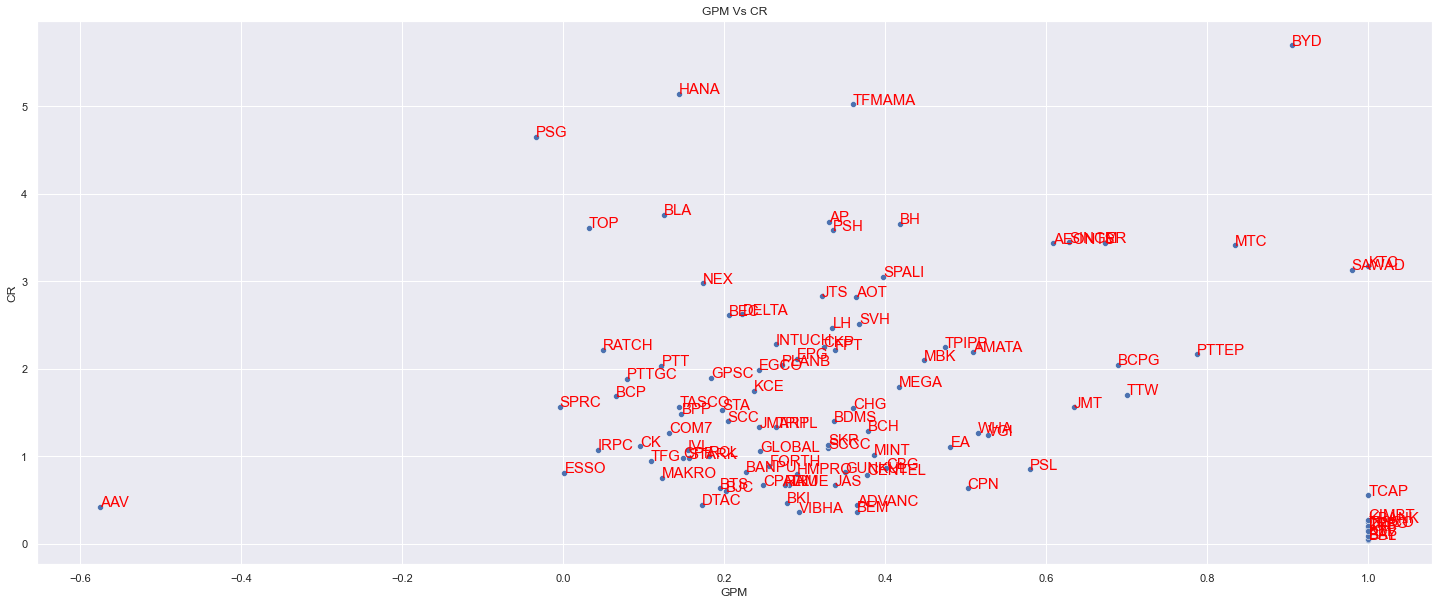

In [597]:
sns.scatterplot(x='GPM',y='CR',data=th_cluster)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('GPM Vs CR')
for i in range(th_cluster.shape[0]):
    plt.text(x=th_cluster.GPM[i],y=th_cluster.CR[i],s=th_cluster.index[i],fontdict=dict(color='red',size=15))

## PART III. PREPROCESSING DATA

(array([45., 28.,  7.,  6.,  2.,  4.,  5.,  2.,  0.,  1.]),
 array([ 0.16974787,  1.28099895,  2.39225003,  3.50350111,  4.61475219,
         5.72600327,  6.83725435,  7.94850543,  9.05975651, 10.17100759,
        11.28225868]),
 <BarContainer object of 10 artists>)

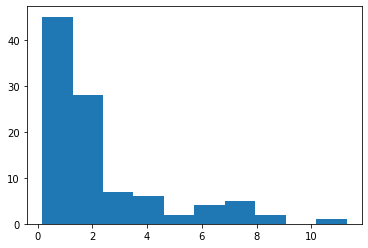

In [363]:
plt.hist(thstock['DE'])

In [364]:
sc = StandardScaler()
sc.fit(thstock)
stock_norm = sc.transform(thstock) 
stock_norm = pd.DataFrame(stock_norm,columns=thstock.columns,index=thstock.index)
stock_norm

,NPM,GPM,ROE,CR,CFOR,DE,ICR,PTR,ITR,RTR,CCC,CAGR
PTT,-0.382222,-0.872924,-0.085826,0.289659,0.579159,-0.365938,0.115150,0.125557,-0.155276,-0.149007,-0.311538,-0.409382
AOT,-1.499234,-0.070379,-0.454802,0.935112,0.189323,-0.807188,0.112740,-0.033711,-0.051860,-0.121550,-0.448491,-0.302389
PTTEP,0.091951,1.333351,-0.105185,0.398342,1.835033,-0.613327,0.114551,-0.076261,-0.179357,-0.248858,0.092339,-0.054138
ADVANC,-0.003992,-0.064918,2.653846,-1.017707,0.925087,0.583179,0.114907,-0.499844,-0.090020,-0.159666,-0.578190,-0.185278
CPALL,-0.408406,-0.453803,0.743340,-0.830780,-0.086715,0.830084,0.115756,-0.483935,-0.154914,0.776605,-0.614290,-0.414950
...,...,...,...,...,...,...,...,...,...,...,...,...
CK,-0.301152,-0.962042,-0.456172,-0.467042,-0.674940,-0.022887,0.116576,-0.188665,-0.057355,-0.294157,-0.157664,-0.450183
STA,-0.288185,-0.623023,0.500110,-0.123943,-0.014698,-0.460176,0.113075,2.943160,-0.179520,-0.188850,0.127834,0.268674
BCPG,1.073310,1.010049,-0.023618,0.299509,0.678206,-0.436600,0.115849,0.437587,-0.189541,-0.301912,-0.465704,-0.535293
VIBHA,-0.086367,-0.307685,-0.047487,-1.084161,-0.170842,-0.490834,0.115378,0.230409,-0.112764,-0.227852,-0.285071,-0.262274


In [365]:
stock_norm.describe()

,NPM,GPM,ROE,CR,CFOR,DE,ICR,PTR,ITR,RTR,CCC,CAGR
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.220446e-17,-1.065814e-16,1.776357e-17,2.842171e-16,2.131628e-16,8.271162e-17,1.720846e-17,-2.442491e-17,-2.498002e-17,-5.331673e-17,-2.498002e-17,8.881784e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.883693e+00,-3.186328e+00,-4.058960e+00,-1.340497e+00,-4.781341e+00,-9.002338e-01,-9.923480e+00,-9.190081e-01,-1.895412e-01,-3.667542e-01,-7.699592e-01,-7.600571e-01
25%,-3.332521e-01,-6.409605e-01,-4.170483e-01,-7.252015e-01,-5.057586e-01,-6.579876e-01,1.129917e-01,-5.519605e-01,-1.885566e-01,-2.958097e-01,-4.657038e-01,-4.063994e-01
50%,-1.671628e-01,-1.849877e-01,-5.162250e-02,-2.587328e-01,-1.045436e-01,-3.648922e-01,1.157459e-01,-1.298849e-01,-1.730534e-01,-2.367225e-01,-2.990200e-01,-2.689331e-01
75%,3.214935e-01,3.941370e-01,4.225095e-01,4.643159e-01,4.436943e-01,1.439711e-01,1.164176e-01,2.346836e-01,-1.497157e-01,-1.203892e-01,-1.118370e-02,-5.662450e-02
max,7.456403e+00,2.041540e+00,2.653846e+00,3.294036e+00,2.638309e+00,3.969592e+00,1.323407e-01,5.277883e+00,7.952350e+00,7.956386e+00,5.501011e+00,7.866774e+00


In [366]:
stock_norm.isnull().sum()

NPM     0
GPM     0
ROE     0
CR      0
CFOR    0
DE      0
ICR     0
PTR     0
ITR     0
RTR     0
CCC     0
CAGR    0
dtype: int64

## PART IV. Clustering Model 
### I.KMeans

Text(0.5, 1.0, 'Silhouette_score for optimal number of clusters')

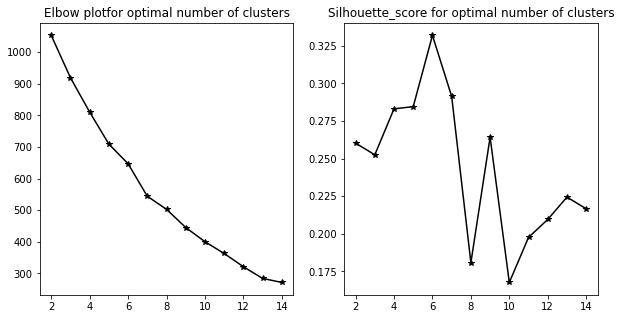

In [387]:
elbow = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stock_norm)
    elbow.append(kmeans.inertia_)
sh_score = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stock_norm)
    sh_score.append(silhouette_score(stock_norm, kmeans.labels_))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(range(2,15),elbow,marker="*",c="black")
ax1.set_title("Elbow plotfor optimal number of clusters")
ax2.plot(range(2,15),sh_score,marker="*",c="black")
ax2.set_title("Silhouette_score for optimal number of clusters")

In [485]:
kmean= KMeans(6)
kmean.fit(stock_norm)
th_cluster['KMeans_cluster'] = kmean.labels_

### II.Birch

In [486]:
birch_cluster= Birch(n_clusters=6)
birch_cluster.fit(stock_norm)
th_cluster['Birch_cluster'] = birch_cluster.labels_

### III. SpectralClustering

In [487]:
model_sc = SpectralClustering(n_clusters=6)
model_sc.fit(stock_norm)
th_cluster['Spect_cluster'] = model_sc.labels_

### IV. AgglomerativeClustering

In [492]:
agg_cluster= AgglomerativeClustering(n_clusters=6)
agg_cluster.fit(stock_norm)
th_cluster['Agglom_cluster'] = agg_cluster.labels_

### V.MiniBatchKMeans

In [494]:
model_mini = MiniBatchKMeans(n_clusters=6)
model_mini.fit(stock_norm)
th_cluster['MiniK_cluster'] = model_mini.labels_

C:\Users\warintorn.nawong13\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


### VI.GaussianMixture

In [501]:
model_gb = GaussianMixture(n_components=5)
model_gb.fit(stock_norm)
th_cluster['GuassMix_cluster'] = model_gb.predict(stock_norm)

In [502]:
th_cluster

,NPM,GPM,ROE,CR,CFOR,DE,ICR,PTR,ITR,RTR,CCC,CAGR,KMeans_cluster,Birch_cluster,Spect_cluster,Agglom_cluster,MiniK_cluster,GuassMix_cluster
PTT,0.041110,0.121907,0.098274,2.033636,0.686098,1.388964,-6.388215,12.181965,11.995739,10.181607,36.314103,-0.045419,0,0,1,5,5,0
AOT,-0.320577,0.363704,0.055655,2.819919,0.463676,0.382071,-17.370239,10.324552,48.200326,11.465500,4.054573,0.014679,0,0,1,5,5,0
PTTEP,0.194646,0.786631,0.096038,2.166032,1.402642,0.824444,-9.116558,9.828318,3.565320,5.512697,131.448309,0.154121,0,0,3,5,5,0
ADVANC,0.163579,0.365350,0.414725,0.441018,0.883469,3.554764,-7.493411,4.888395,34.841029,9.683197,-26.496318,0.080460,0,0,4,5,5,0
CPALL,0.032631,0.248184,0.194049,0.668730,0.306181,4.118178,-3.624226,5.073923,12.122460,53.462224,-34.999793,-0.048546,0,0,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CK,0.067360,0.095057,0.055497,1.111832,-0.029433,2.171775,0.111886,8.517439,46.276729,3.394547,72.559468,-0.068337,0,0,1,5,5,0
STA,0.071558,0.197200,0.165954,1.529791,0.347271,1.173921,-15.845497,45.041526,3.508425,8.318613,139.809171,0.335445,0,1,1,2,0,0
BCPG,0.512407,0.689224,0.105460,2.045634,0.742610,1.227718,-3.199417,15.820933,0.000000,3.031962,0.000000,-0.116143,0,0,1,5,5,0
VIBHA,0.136907,0.292207,0.102703,0.360065,0.258182,1.103962,-5.349730,13.404778,26.878530,6.494911,42.548356,0.037212,0,0,1,5,5,0


In [536]:
all_plot = th_cluster.copy()

## PART V. Results

In [540]:
def plot_heat(columns) :   
    all_columns = ['NPM', 'GPM', 'ROE', 'CR', 'CFOR', 'DE', 'ICR', 'PTR', 'ITR', 'RTR','CCC', 'CAGR',columns]

    cluster_plot = all_plot[all_columns] 
    cluster_avg = cluster_plot.groupby(columns).mean()
    population_avg = cluster_plot.mean()
    population_avg = population_avg.drop(columns)
    relative_imp = cluster_avg/population_avg
    relative_imp.sort_values(by=columns,inplace=True)
    relative_imp.round(2).unstack()
    relative_imp_2 = relative_imp.drop(['ICR','ITR','CAGR'],axis=1)


    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 7))
    ax1.set_title('Relative Importance of All Attributes with ' + columns)
    ax2.set_title('Relative Importance of Attributes without "ICR,ITR,CAGR" with ' + columns)
    sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto',ax=ax1)
    sns.heatmap(data=relative_imp_2, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto',ax=ax2)

    ax1.set_xlabel('Features')
    ax1.set_ylabel('Clusters')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Clusters')
    plt.show()

### Heat Map Visualization between Clustering Algorithm

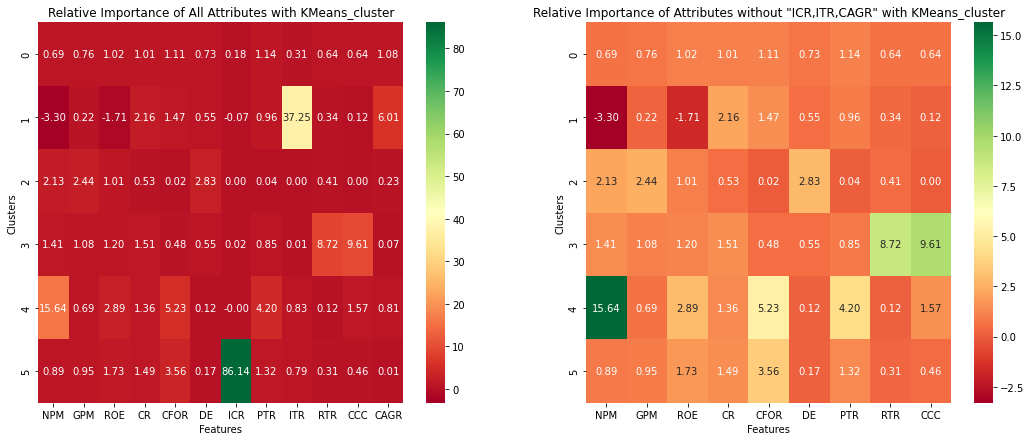

In [538]:
plot_heat('KMeans_cluster')

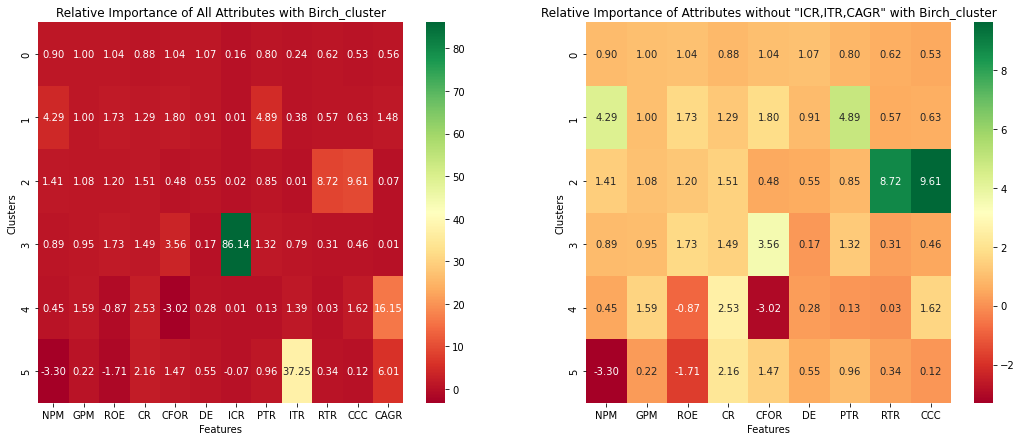

In [541]:
plot_heat('Birch_cluster')

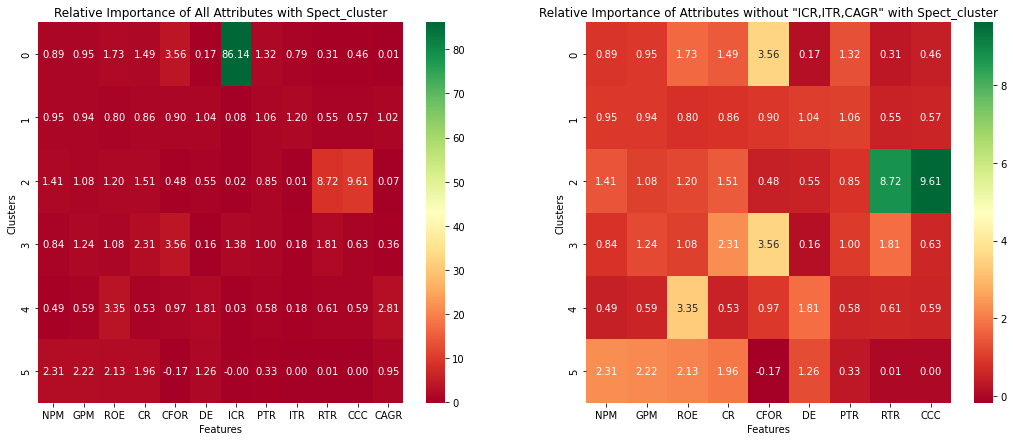

In [542]:
plot_heat('Spect_cluster')

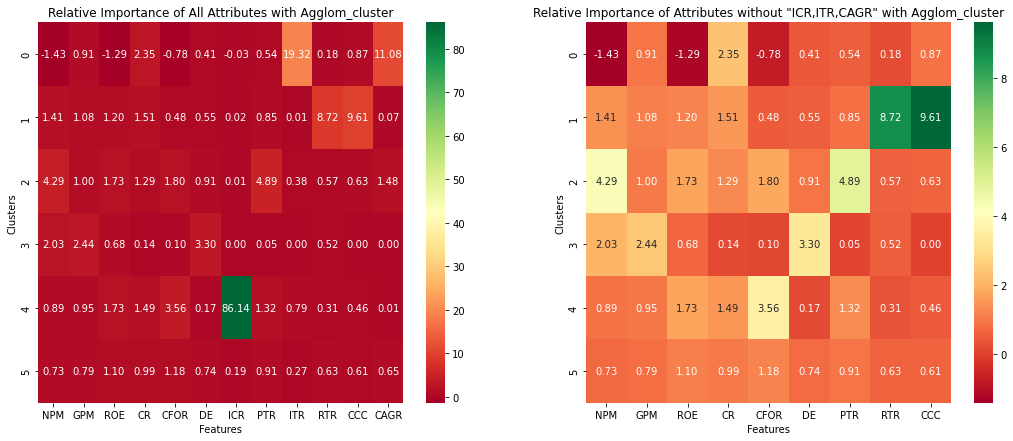

In [543]:
plot_heat('Agglom_cluster')

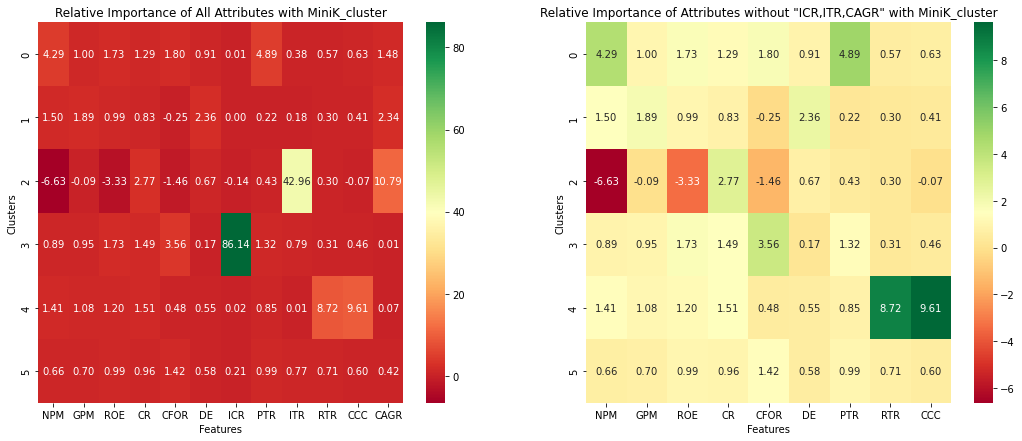

In [544]:
plot_heat('MiniK_cluster')

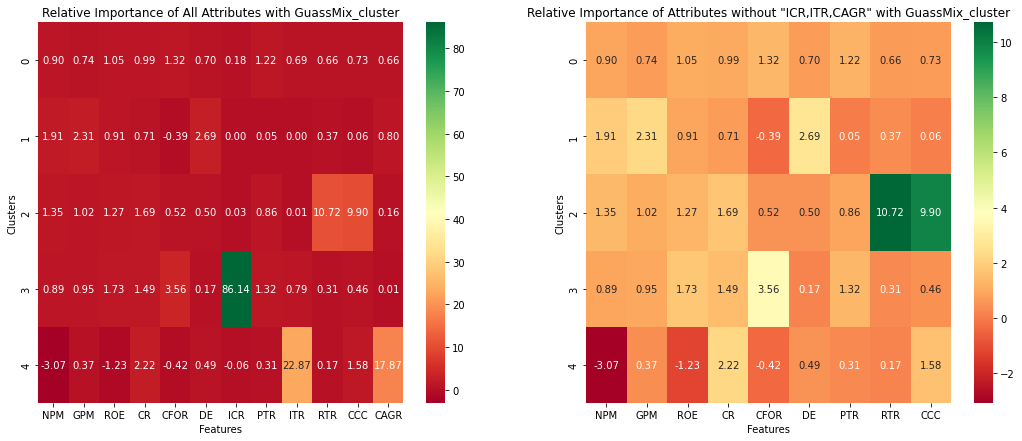

In [545]:
plot_heat('GuassMix_cluster')